In [1]:
import sys

import MDAnalysis as mda
from MDAnalysis.analysis import dihedrals
from MDAnalysis.analysis import contacts
from statistics import mean, stdev
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import time
import glob
import math



import os
from pathlib import Path
home = str(Path.home())



scripts_dir = home+'/PycharmProjects/pia-x/coupler/scripts/'
sys.path.insert(0, scripts_dir)
from _heatmap import *


scripts_dir = home+'/PycharmProjects/dopamine/core/'
sys.path.insert(0, scripts_dir)
from ppaa import *


In [2]:
# testcase
PDB="infiles/d3_gi_pd_mod.pdb"
DCDs=glob.glob('infiles/test_d3_gi_pd_*.dcd')
u = mda.Universe(PDB, DCDs)

In [3]:
# define
# receptor
rec_chainid='R'
rec_segments=['27:57', '63:91', '100:134', '145:170', '186:218', '322:354', '362:400']
rec_labels=['TM1','TM2','TM3','TM4','TM5','TM6','TM7']
# Ga
ga_chainid='A'
ga_segments=['7:31','47:56','242:255','271:280', '296:311','329:351']

# need to refine above definition

# steal from https://www.uniprot.org/uniprot/P63096


In [4]:
# create matrix


def get_segments_distance(segmanet_list1, segmanet_chainid1, segmanet_list2, segmanet_chainid2):
    # get segments distance
    
    matrix = np.zeros((len(segmanet_list1), len(segmanet_list2)))

    
    if str(segmanet_chainid1)==str(segmanet_chainid2):
        for i in range(len(segmanet_list1)):
            for j in range(i+1,len(segmanet_list2)):
                _selseg1=u.select_atoms('protein and segid C'+segmanet_chainid1+' and resid '+segmanet_list1[i]+' and (not type H)')
                _a=_selseg1.center_of_mass()
                _selseg2=u.select_atoms('protein and segid C'+segmanet_chainid2+' and resid '+segmanet_list2[j]+' and (not type H)')
                _b=_selseg2.center_of_mass()
                matrix[i][j]=np.linalg.norm(_a-_b)
        matrix += matrix.T
    else:
        for i in range(len(segmanet_list1)):
            for j in range(len(segmanet_list2)):
                _selseg1=u.select_atoms('protein and segid C'+segmanet_chainid1+' and resid '+segmanet_list1[i]+' and (not type H)')
                _a=_selseg1.center_of_mass()
                _selseg2=u.select_atoms('protein and segid C'+segmanet_chainid2+' and resid '+segmanet_list2[j]+' and (not type H)')
                _b=_selseg2.center_of_mass()
                matrix[i][j]=np.linalg.norm(_a-_b)

    return matrix

Text(0, 0.5, 'REC')

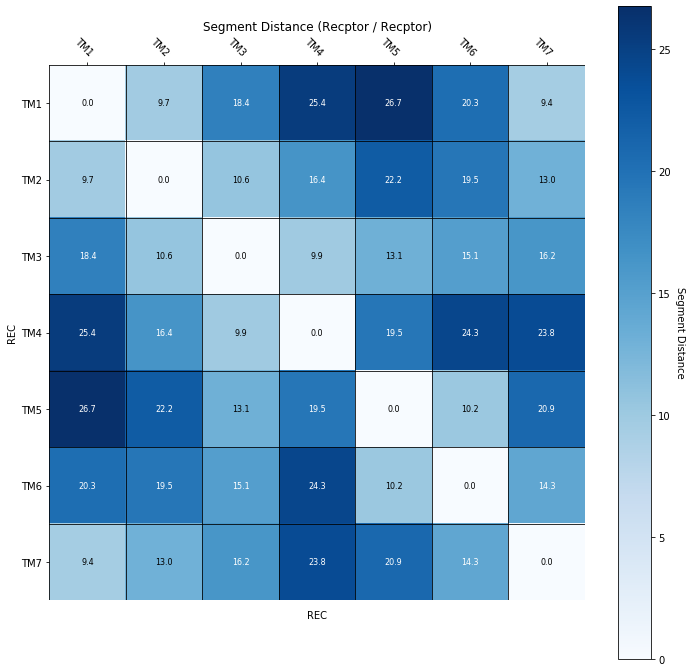

In [5]:
matrix=get_segments_distance(rec_segments,rec_chainid,rec_segments,rec_chainid)

xlabels=rec_labels
ylabels=rec_labels
x_axis_label="REC"
y_axis_label="REC"
title="Segment Distance (Recptor / Recptor)"

plt.figure(figsize=(12,12))
plot_index = 1
ax = plt.subplot(1, 1, plot_index)
im,cbar = heatmap(matrix,xlabels, ylabels,ax=ax,cmap="Blues", cbarlabel="Segment Distance")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=8)
ax.set_title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)


Text(0, 0.5, 'REC')

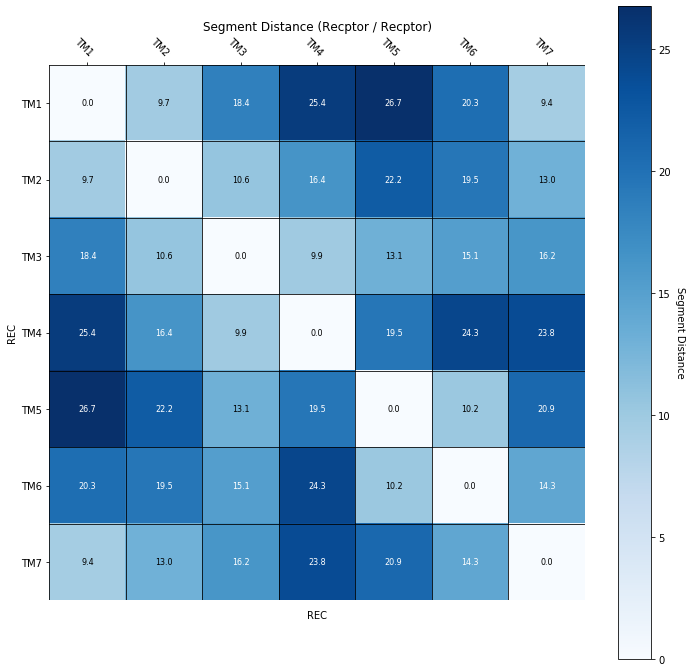

In [6]:
matrix=get_segments_distance(rec_segments,rec_chainid,rec_segments,rec_chainid)

xlabels=rec_labels
ylabels=rec_labels
x_axis_label="REC"
y_axis_label="REC"
title="Segment Distance (Recptor / Recptor)"

plt.figure(figsize=(12,12))
plot_index = 1
ax = plt.subplot(1, 1, plot_index)
im,cbar = heatmap(matrix,xlabels, ylabels,ax=ax,cmap="Blues", cbarlabel="Segment Distance")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=8)
ax.set_title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)


Text(0, 0.5, 'REC')

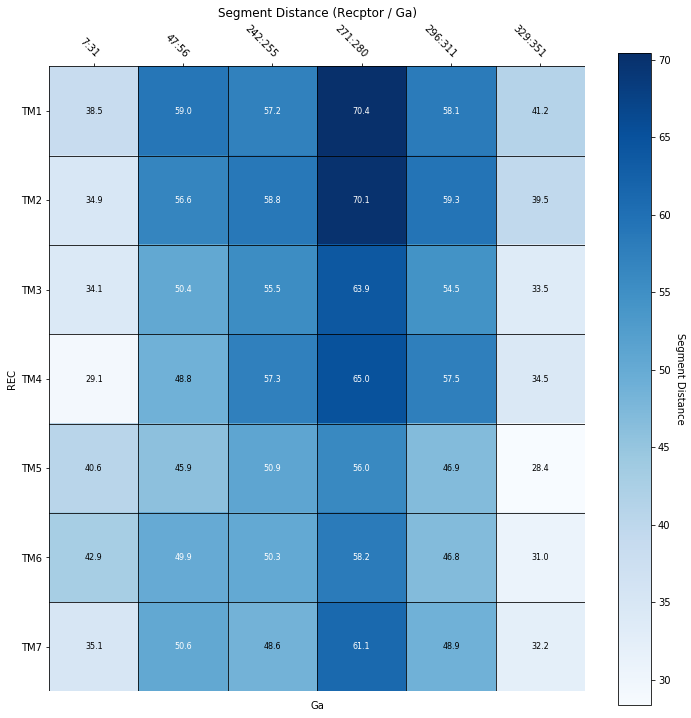

In [7]:
matrix=get_segments_distance(rec_segments,rec_chainid,ga_segments,ga_chainid)

xlabels=rec_labels
ylabels=ga_segments
x_axis_label="Ga"
y_axis_label="REC"
title="Segment Distance (Recptor / Ga)"

plt.figure(figsize=(12,12))
plot_index = 1
ax = plt.subplot(1, 1, plot_index)
im,cbar = heatmap(matrix,xlabels, ylabels,ax=ax,cmap="Blues", cbarlabel="Segment Distance")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=8)
ax.set_title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)


In [8]:
## comparison

In [9]:
# testcase
PDB="infiles/d3_go_pd_mod.pdb"
DCDs=glob.glob('infiles/test_d3_go_pd_*.dcd')
u = mda.Universe(PDB, DCDs)

In [10]:
matrix2=get_segments_distance(rec_segments,rec_chainid,ga_segments,ga_chainid)

In [11]:
matrix_diff=get_matrix_diff(matrix, matrix2)

Text(0, 0.5, 'REC')

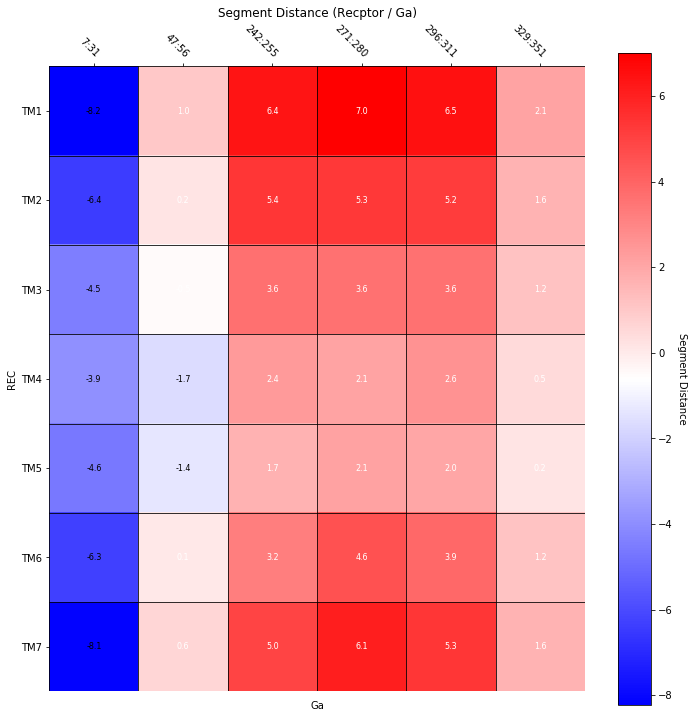

In [12]:
xlabels=rec_labels
ylabels=ga_segments
x_axis_label="Ga"
y_axis_label="REC"
title="Segment Distance (Recptor / Ga)"

plt.figure(figsize=(12,12))
plot_index = 1
ax = plt.subplot(1, 1, plot_index)
im,cbar = heatmap(matrix_diff,xlabels, ylabels,ax=ax,cmap="bwr", cbarlabel="Segment Distance")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=8)
ax.set_title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
